In [194]:
# media id - 7
# media name - 8

file_names = [
    'domestic-violence-stories (8640).csv', 
    'family-violence-stories (4014).csv'
]

In [195]:
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
import configparser
import warnings
import csv 
import plotly.plotly as py
import plotly.graph_objs as go

warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore", category=UserWarning)

config = configparser.ConfigParser()
config.read('config.ini')
py_username = config['PLOTLY']['Username']
py_key = config['PLOTLY']['Key']

plotly.tools.set_credentials_file(username=py_username, api_key=py_key)

In [196]:
import numpy as np


def generate_color(n):
    color = []
    for i in range(n):
        string = 'rgb('
        string += str(int(np.random.rand()*255)) + ', '
        string += str(int(np.random.rand()*255)) + ', '
        string += str(int(np.random.rand()*255)) + ')'
        color.append(string)
    return color

In [208]:
def transform_url(url):
    url = url[url.index('://')+3:]
    url = url[:url.index('/')]
    if url.startswith('www'):
        url = url[url.index('www')+4:]
    return url

In [209]:
def generate_data_frame(file_name):
    media_counts = {}
    with open('input/'+file_name, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            if row[0] != 'stories_id':
                media_name = transform_url(row[3])
                media_counts[media_name] = media_counts.get(media_name, 0) + 1
                
    df = pd.Series(media_counts).to_frame('count')
    n = df.shape[0]
    num_stories = df['count'].sum(axis=0)
    
    return df, n, num_stories

In [210]:
def list_media_sources(file_name):
    
    df, n, num_stories = generate_data_frame(file_name)
    
    df.sort_values(by='count', ascending=False, inplace=True)
    print('\n'+file_name+'\nNumber of media sources:', n)
    print(df)

In [211]:
for name in file_names:
    list_media_sources(name)


domestic-violence-stories (8640).csv
Number of media sources: 48
                                     count
theage.com.au                         3872
heraldsun.com.au                       736
abc.net.au                             629
geelongadvertiser.com.au               265
news.theage.com.au                     195
weeklytimesnow.com.au                  161
bordermail.com.au                       51
thecourier.com.au                       41
stockandland.com.au                     34
bendigoadvertiser.com.au                31
sunraysiadaily.com.au                   25
pakenham.starcommunity.com.au           21
standard.net.au                         19
mailtimes.com.au                        17
rss.feedsportal.com                     17
berwick.starcommunity.com.au            12
stawelltimes.com.au                     11
araratadvertiser.com.au                 10
latrobevalleyexpress.com.au              9
hepburnadvocate.com.au                   9
cranbournenews.starcommunity.co

In [206]:
def generate_bubble_chart(file_name):
    
    df, n, num_stories = generate_data_frame(file_name)
    
    df.sort_index(inplace=True)
    color = generate_color(n)
    opacity = [1] * n
    size = [(value/10) for value in df['count'].values]
    text = df.index.tolist()
    
    trace0 = go.Scatter(
        x = df.index.tolist(),
        y = df['count'].tolist(),
        text = text,
        mode = 'markers',
        marker = dict(
           color = color,
           opacity = opacity,
           size = size
        )
    )
    data = [trace0]
    py.iplot(data, filename=file_name, title='Num of stories from each media')

In [207]:
for name in file_names:
    generate_bubble_chart(name)

In [242]:
import datetime
import matplotlib.pyplot as plt


def generate_bar_chart(file_name):
    df, _, _ = generate_data_frame(file_name)
    df.sort_values(by='count', ascending=False, inplace=True)
    top_medias = df.index.tolist()[:5]
    
    print('\n'+file_name+'\n'+'Top 5 media:')
    for media in top_medias:
        print(media)
    
    df = pd.read_csv('input/'+file_name)
    
    start_year = 2014
    end_year = 2018
    
    counts_by_year = []
    for i in range(len(top_medias)):
        counts_by_year.append([0]*(end_year - start_year + 1))
        
    for _, row in df.iterrows():
        url = transform_url(row['url'])
        if  url in top_medias:
            index = top_medias.index(url)

            try:
                date = row['publish_date']
                datetime_object = datetime.datetime.strptime(date, '%Y/%m/%d')
                year = datetime_object.year
                if year >= start_year and year <= end_year:
                    counts_by_year[index][year-start_year] += 1
            except:
                pass

    N = end_year - start_year + 1
    ind = np.arange(N)    # the x locations for the groups
    width = 0.35      # the width of the bars: can also be len(x) sequence

    count_0 = np.array(counts_by_year[0])
    count_1 = np.array(counts_by_year[1])
    count_2 = np.array(counts_by_year[2])
    count_3 = np.array(counts_by_year[3])
    count_4 = np.array(counts_by_year[4])
    
    plt.figure(figsize=(24,12))
    
    p1 = plt.bar(ind, count_4, width)
    p2 = plt.bar(ind, count_3, width, bottom=count_4)
    p3 = plt.bar(ind, count_2, width, bottom=count_3)
    p4 = plt.bar(ind, count_1, width, bottom=count_2)
    p5 = plt.bar(ind, count_0, width, bottom=count_1)
    
    names = np.array(top_medias)
    
    plt.ylabel('Number of Stories')
    plt.title('Number of stories by year')
    plt.xticks(ind, ('2014', '2015', '2016', '2017', '2018'))
#     plt.yticks(np.arange(0, 2001, 500))
    plt.legend((p5[0], p4[0], p3[0], p2[0], p1[0]), names)

    plt.show()


domestic-violence-stories (8640).csv
Top 5 media:
theage.com.au
heraldsun.com.au
abc.net.au
geelongadvertiser.com.au
news.theage.com.au


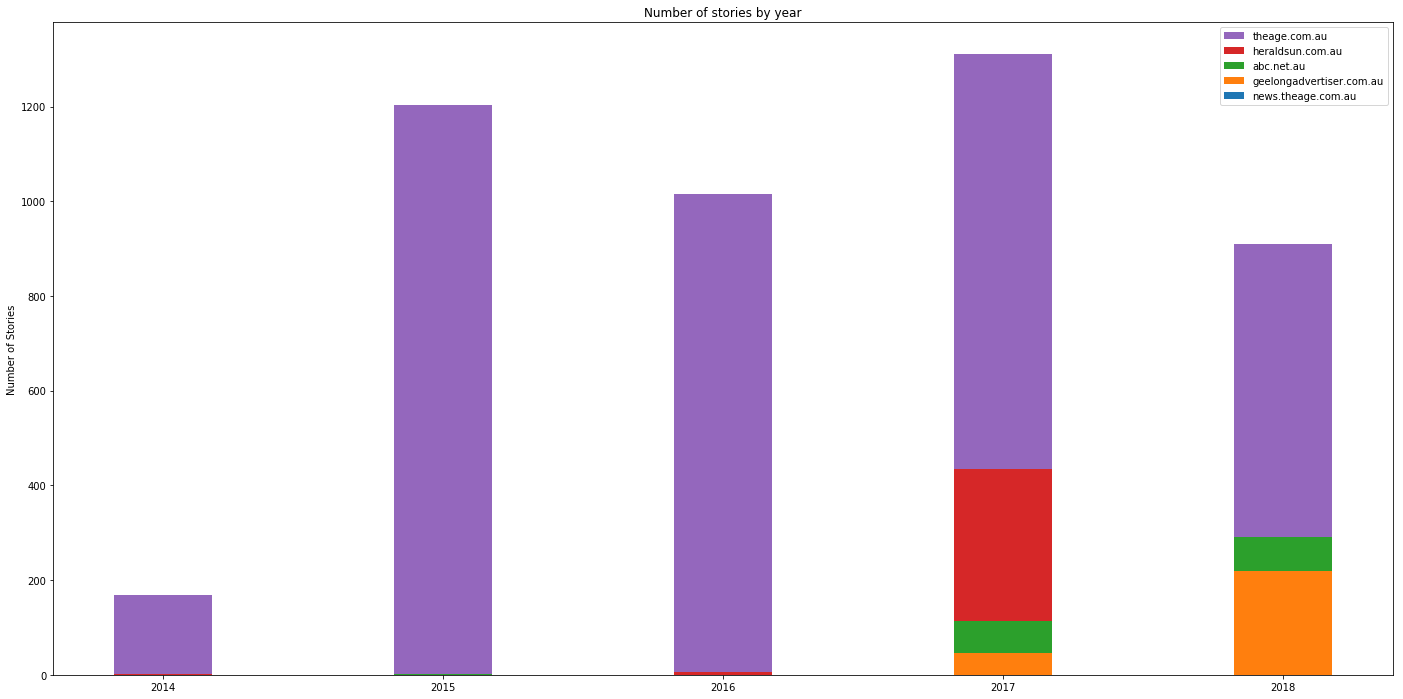


family-violence-stories (4014).csv
Top 5 media:
theage.com.au
abc.net.au
heraldsun.com.au
thecourier.com.au
bendigoadvertiser.com.au


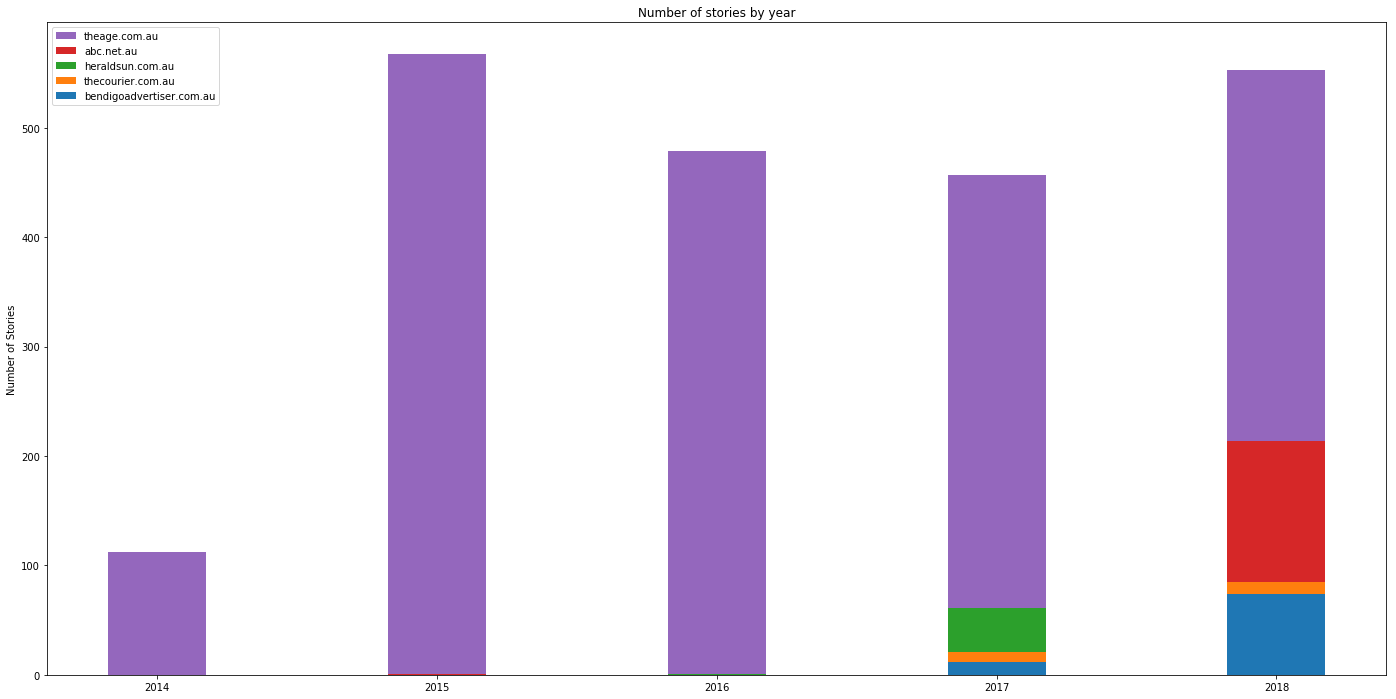

In [243]:
for name in file_names:
    generate_bar_chart(name)